In [2978]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mlxtend
from scipy.sparse import csr_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 

df = pd.read_csv('popular_matches.csv')

DATA PREPROCESSING

In [2981]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   opponent_1                                  152 non-null    object 
 1   opponent_2                                  152 non-null    object 
 2   opponent_1_estimated_punch_power            152 non-null    int64  
 3   opponent_2_estimated_punch_power            152 non-null    int64  
 4   opponent_1_estimated_punch_resistance       150 non-null    float64
 5   opponent_2_estimated_punch_resistance       144 non-null    float64
 6   opponent_1_estimated_ability_to_take_punch  151 non-null    float64
 7   opponent_2_estimated_ability_to_take_punch  145 non-null    float64
 8   opponent_1_rounds_boxed                     152 non-null    int64  
 9   opponent_2_rounds_boxed                     125 non-null    float64
 10  opponent_1_rou

In [2983]:
#drop missing values
df_d = df.dropna()

In [2985]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 151
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   opponent_1                                  60 non-null     object 
 1   opponent_2                                  60 non-null     object 
 2   opponent_1_estimated_punch_power            60 non-null     int64  
 3   opponent_2_estimated_punch_power            60 non-null     int64  
 4   opponent_1_estimated_punch_resistance       60 non-null     float64
 5   opponent_2_estimated_punch_resistance       60 non-null     float64
 6   opponent_1_estimated_ability_to_take_punch  60 non-null     float64
 7   opponent_2_estimated_ability_to_take_punch  60 non-null     float64
 8   opponent_1_rounds_boxed                     60 non-null     int64  
 9   opponent_2_rounds_boxed                     60 non-null     float64
 10  opponent_1_round_ko_

In [2987]:
df_d.head(15)

,opponent_1,opponent_2,opponent_1_estimated_punch_power,opponent_2_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_has_been_ko_percentage,opponent_2_has_been_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,Result
0,Vasyl Lomachenko,Luke Campbell,72,72,73.9,60.5,78.0,73.0,119,130.0,8.40,12.31,0.00,0.00,127.11,135.24,win_1
1,Orlando Fiordigiglio,Sam Eggington,59,59,55.4,54.5,68.0,66.0,200,177.0,6.50,8.47,3.03,6.25,152.50,148.93,win_2
2,Gennady Golovkin,Sergiy Derevyanchenko,82,82,68.0,63.3,84.0,75.0,200,81.0,17.50,12.35,0.00,0.00,159.66,164.04,win_1
5,Shawn Porter,Errol Spence Jr,66,66,63.8,62.3,80.0,77.0,219,108.0,7.76,19.44,0.00,0.00,152.53,148.47,win_2
6,Zaur Abdullaev,Devin Haney,64,64,58.4,47.0,72.0,73.0,60,110.0,8.33,12.73,0.00,0.00,0.00,0.00,win_2
7,Tyson Fury,Otto Wallin,72,72,66.5,57.4,86.0,77.0,174,90.0,11.49,14.44,0.00,0.00,247.50,240.54,win_1
9,Artur Beterbiev,Oleksandr Gvozdyk,88,88,68.4,67.5,81.0,78.0,52,88.0,26.92,15.91,0.00,0.00,178.65,174.95,win_1
12,Dereck Chisora,David Price,65,65,63.9,65.6,78.0,70.0,252,105.0,8.73,18.10,7.50,20.69,238.35,246.75,win_1
13,Olajide William Olatunji,Logan Paul,0,0,0.0,0.0,0.0,0.0,0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,win_1
19,Sugar Ray Leonard,Marvin Hagler,73,73,66.9,62.0,82.0,89.0,244,386.0,9.84,13.47,0.00,0.00,151.51,177.35,win_1


In [2989]:
print(df_d.dtypes)

opponent_1                                     object
opponent_2                                     object
opponent_1_estimated_punch_power                int64
opponent_2_estimated_punch_power                int64
opponent_1_estimated_punch_resistance         float64
opponent_2_estimated_punch_resistance         float64
opponent_1_estimated_ability_to_take_punch    float64
opponent_2_estimated_ability_to_take_punch    float64
opponent_1_rounds_boxed                         int64
opponent_2_rounds_boxed                       float64
opponent_1_round_ko_percentage                float64
opponent_2_round_ko_percentage                float64
opponent_1_has_been_ko_percentage             float64
opponent_2_has_been_ko_percentage             float64
opponent_1_avg_weight                         float64
opponent_2_avg_weight                         float64
Result                                         object
dtype: object


In [2991]:
df_d['opponent_1_estimated_punch_power'] = df_d['opponent_1_estimated_punch_power'].astype(float).copy()

C:\Users\astra\AppData\Local\Temp\ipykernel_7792\1307159244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['opponent_1_estimated_punch_power'] = df_d['opponent_1_estimated_punch_power'].astype(float).copy()


In [2993]:
df_d['opponent_2_estimated_punch_power'] = df_d['opponent_2_estimated_punch_power'].astype(float)

C:\Users\astra\AppData\Local\Temp\ipykernel_7792\2457425225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['opponent_2_estimated_punch_power'] = df_d['opponent_2_estimated_punch_power'].astype(float)


In [2995]:
df_d['opponent_1_rounds_boxed'] = df_d['opponent_1_rounds_boxed'].astype(float)

C:\Users\astra\AppData\Local\Temp\ipykernel_7792\3630275238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['opponent_1_rounds_boxed'] = df_d['opponent_1_rounds_boxed'].astype(float)


In [2997]:
print(df_d.dtypes)

opponent_1                                     object
opponent_2                                     object
opponent_1_estimated_punch_power              float64
opponent_2_estimated_punch_power              float64
opponent_1_estimated_punch_resistance         float64
opponent_2_estimated_punch_resistance         float64
opponent_1_estimated_ability_to_take_punch    float64
opponent_2_estimated_ability_to_take_punch    float64
opponent_1_rounds_boxed                       float64
opponent_2_rounds_boxed                       float64
opponent_1_round_ko_percentage                float64
opponent_2_round_ko_percentage                float64
opponent_1_has_been_ko_percentage             float64
opponent_2_has_been_ko_percentage             float64
opponent_1_avg_weight                         float64
opponent_2_avg_weight                         float64
Result                                         object
dtype: object


In [2999]:

pearson = df_d.corr(numeric_only = True)
 
print(f"Pearson's Coefficient: {pearson}")

Pearson's Coefficient:                                             opponent_1_estimated_punch_power  \
opponent_1_estimated_punch_power                                    1.000000   
opponent_2_estimated_punch_power                                    1.000000   
opponent_1_estimated_punch_resistance                               0.833214   
opponent_2_estimated_punch_resistance                               0.801379   
opponent_1_estimated_ability_to_take_punch                          0.894500   
opponent_2_estimated_ability_to_take_punch                          0.868400   
opponent_1_rounds_boxed                                             0.220500   
opponent_2_rounds_boxed                                             0.281124   
opponent_1_round_ko_percentage                                      0.659778   
opponent_2_round_ko_percentage                                      0.383015   
opponent_1_has_been_ko_percentage                                  -0.006083   
opponent_2_has_be

<Axes: >

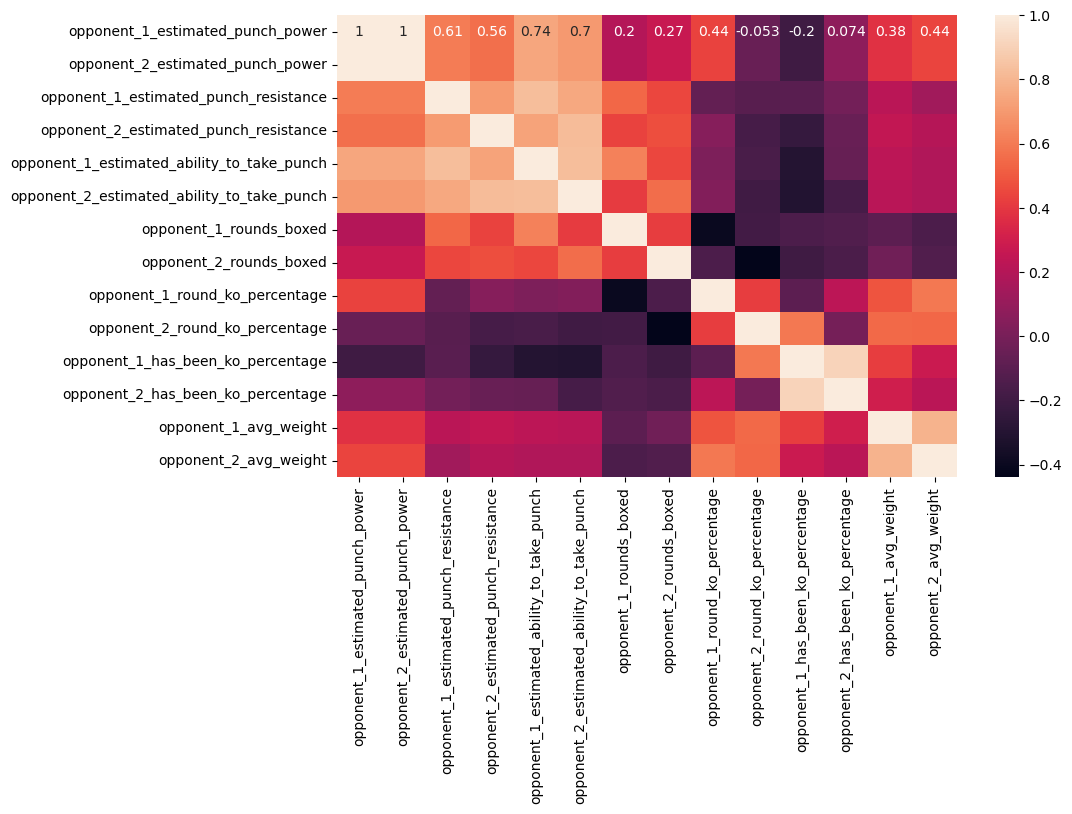

In [3001]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(df.corr(numeric_only=True),ax=ax, annot=True)

In [3002]:
###### Engineering New Features ########

### Make a new feature for punch resistance
df_d['resistance_diff'] = df_d.opponent_1_estimated_punch_resistance - df_d.opponent_2_estimated_punch_resistance 

### Make a new feature for ability to take punch 
df_d['take_diff'] = df_d.opponent_1_estimated_ability_to_take_punch - df_d.opponent_2_estimated_ability_to_take_punch 


### Make a new feature for rounds boxed
df_d['boxround_diff'] = df_d.opponent_1_rounds_boxed - df_d.opponent_2_rounds_boxed    

### Make a new feature for KO percentage of wins
df_d['koround_diff'] = df_d.opponent_1_round_ko_percentage - df_d.opponent_2_round_ko_percentage     


### Make a new feature for Win Percentage
df_d['weight_diff'] = df_d.opponent_1_avg_weight - df_d.opponent_2_avg_weight   



df_d.head()

C:\Users\astra\AppData\Local\Temp\ipykernel_7792\2903860487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['resistance_diff'] = df_d.opponent_1_estimated_punch_resistance - df_d.opponent_2_estimated_punch_resistance
C:\Users\astra\AppData\Local\Temp\ipykernel_7792\2903860487.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['take_diff'] = df_d.opponent_1_estimated_ability_to_take_punch - df_d.opponent_2_estimated_ability_to_take_punch
C:\Users\astra\AppData\Local\Temp\ipykernel_7792\2903860

,opponent_1,opponent_2,opponent_1_estimated_punch_power,opponent_2_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,...,opponent_1_has_been_ko_percentage,opponent_2_has_been_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,Result,resistance_diff,take_diff,boxround_diff,koround_diff,weight_diff
0,Vasyl Lomachenko,Luke Campbell,72.0,72.0,73.9,60.5,78.0,73.0,119.0,130.0,...,0.00,0.00,127.11,135.24,win_1,13.4,5.0,-11.0,-3.91,-8.13
1,Orlando Fiordigiglio,Sam Eggington,59.0,59.0,55.4,54.5,68.0,66.0,200.0,177.0,...,3.03,6.25,152.50,148.93,win_2,0.9,2.0,23.0,-1.97,3.57
2,Gennady Golovkin,Sergiy Derevyanchenko,82.0,82.0,68.0,63.3,84.0,75.0,200.0,81.0,...,0.00,0.00,159.66,164.04,win_1,4.7,9.0,119.0,5.15,-4.38
5,Shawn Porter,Errol Spence Jr,66.0,66.0,63.8,62.3,80.0,77.0,219.0,108.0,...,0.00,0.00,152.53,148.47,win_2,1.5,3.0,111.0,-11.68,4.06
6,Zaur Abdullaev,Devin Haney,64.0,64.0,58.4,47.0,72.0,73.0,60.0,110.0,...,0.00,0.00,0.00,0.00,win_2,11.4,-1.0,-50.0,-4.40,0.00


In [3004]:
"Result" in df_d.columns

True

In [3007]:
print(df_d.columns.tolist())

['opponent_1', 'opponent_2', 'opponent_1_estimated_punch_power', 'opponent_2_estimated_punch_power', 'opponent_1_estimated_punch_resistance', 'opponent_2_estimated_punch_resistance', 'opponent_1_estimated_ability_to_take_punch', 'opponent_2_estimated_ability_to_take_punch', 'opponent_1_rounds_boxed', 'opponent_2_rounds_boxed', 'opponent_1_round_ko_percentage', 'opponent_2_round_ko_percentage', 'opponent_1_has_been_ko_percentage', 'opponent_2_has_been_ko_percentage', 'opponent_1_avg_weight', 'opponent_2_avg_weight', 'Result', 'resistance_diff', 'take_diff', 'boxround_diff', 'koround_diff', 'weight_diff']


In [3009]:
df_d.index.names

FrozenList([None])

In [3011]:
from pandas.plotting import scatter_matrix

# Dropping the 'result' column to enter into y_train
 

y = pd.read_csv('d.csv')
y['Result'] = y['Result'].str.strip()
print(y)


   Result
0    win1
1    win2
2    win1
3    win2
4    win2
5    win1
6    win1
7    win1
8    win1
9    win1
10   win1
11   win2
12   win1
13   win2
14   win2
15   win2
16   win1
17   win2
18   draw
19   win2
20   win1
21   win2
22   win2
23   win1
24   win1
25   win2
26   win2
27   win1
28   win1
29   draw
30   draw
31   win2
32   win2
33   win2
34   win2
35   win2
36   win2
37   win2
38   win2
39   win2
40   win1
41   win2
42   win2
43   win1
44   win2
45   win2
46   draw
47   win1
48   win2
49   win2
50   win2
51   win2
52   win1
53   win1
54   draw
55   win1
56   win2
57   win2
58   win2
59   win2


In [3013]:
X = df_d.drop(['opponent_1', 'opponent_2','Result'], axis='columns')

In [3015]:
X.head()

,opponent_1_estimated_punch_power,opponent_2_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_has_been_ko_percentage,opponent_2_has_been_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,resistance_diff,take_diff,boxround_diff,koround_diff,weight_diff
0,72.0,72.0,73.9,60.5,78.0,73.0,119.0,130.0,8.40,12.31,0.00,0.00,127.11,135.24,13.4,5.0,-11.0,-3.91,-8.13
1,59.0,59.0,55.4,54.5,68.0,66.0,200.0,177.0,6.50,8.47,3.03,6.25,152.50,148.93,0.9,2.0,23.0,-1.97,3.57
2,82.0,82.0,68.0,63.3,84.0,75.0,200.0,81.0,17.50,12.35,0.00,0.00,159.66,164.04,4.7,9.0,119.0,5.15,-4.38
5,66.0,66.0,63.8,62.3,80.0,77.0,219.0,108.0,7.76,19.44,0.00,0.00,152.53,148.47,1.5,3.0,111.0,-11.68,4.06
6,64.0,64.0,58.4,47.0,72.0,73.0,60.0,110.0,8.33,12.73,0.00,0.00,0.00,0.00,11.4,-1.0,-50.0,-4.40,0.00


In [3017]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (45, 19) (45, 1)
Test (15, 19) (15, 1)


In [3019]:
# one-hot encode target variables
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(y_train)
y_train = onehot_encoder.transform(y_train)
y_test = onehot_encoder.transform(y_test)

In [3021]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [3023]:
X_trainT     = X_train.reshape(23,19)
y_trainT     = y_train.reshape(23,19)

ValueError: cannot reshape array of size 855 into shape (23,19)

In [3025]:
print('Train', X_trainT.shape, y_trainT.shape)

NameError: name 'X_trainT' is not defined

In [2976]:
print('Train', y_test.shape, y_train.shape)

Train (15, 3) (45, 3)


In [2875]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.preprocessing import DenseTransformer
import re
import numpy as np



pipe_1 = Pipeline([
    ('vect', CountVectorizer()),
    ('to_dense', DenseTransformer()),
    ('clf', RandomForestClassifier())
])

parameters_1 = dict(
    clf__n_estimators=[50, 100, 200],
    clf__max_features=['sqrt', 'log2', None],)

grid_search_1 = GridSearchCV(pipe_1, 
                             parameters_1, 
                             n_jobs=1, 
                             verbose=1,
                             scoring='accuracy',
                             cv=2)


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipe_1.steps])
print("parameters:")
grid_search_1.fit(X_train, y_train)
print("Best score: %0.3f" % grid_search_1.best_score_)
print("Best parameters set:")
best_parameters_1 = grid_search_1.best_estimator_.get_params()
for param_name in sorted(parameters_1.keys()):
    print("\t%s: %r" % (param_name, best_parameters_1[param_name]))

Performing grid search...
pipeline: ['vect', 'to_dense', 'clf']
parameters:
Fitting 2 folds for each of 9 candidates, totalling 18 fits


ValueError: 
All the 18 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\astra\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\astra\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\astra\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 345, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\astra\anaconda3\Lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\astra\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1124, in check_X_y
    check_consistent_length(X, y)
  File "C:\Users\astra\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 397, in check_consistent_length
    raise ValueError(
ValueError: Found input variables with inconsistent numbers of samples: [19, 22]

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\astra\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\astra\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\astra\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 345, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\astra\anaconda3\Lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\astra\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1124, in check_X_y
    check_consistent_length(X, y)
  File "C:\Users\astra\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 397, in check_consistent_length
    raise ValueError(
ValueError: Found input variables with inconsistent numbers of samples: [19, 23]
